<a href="https://colab.research.google.com/github/Aswinramesh04/100-DaysOfCode-DataScience/blob/main/Day46_KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Day46 KNN Regression    By: Loga Aswin

In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Pre-processing:**

In [14]:
df = pd.read_csv("/content/Salary_dataset..csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [15]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [16]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [17]:
X = df.drop('Salary', axis=1)
Y = df['Salary']

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

**Creating and Training KNN Model :**

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)

KNeighborsRegressor()

**Predict Test Results :**

In [30]:
y_pred = regressor.predict(x_test)

In [33]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
27,112636.0,115250.0
15,67939.0,59395.4
23,113813.0,106312.4
17,83089.0,71905.8
8,64446.0,58050.8
9,57190.0,57500.0


**Evaluation Model Metrics:**

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mae

6091.099999999999

In [36]:
mse = mean_squared_error(y_test, y_pred)
mse

50357290.43333333

**Visualizing Results :**

In [37]:
min(x_test.values), max(x_test.values)

(array([3.3]), array([9.7]))

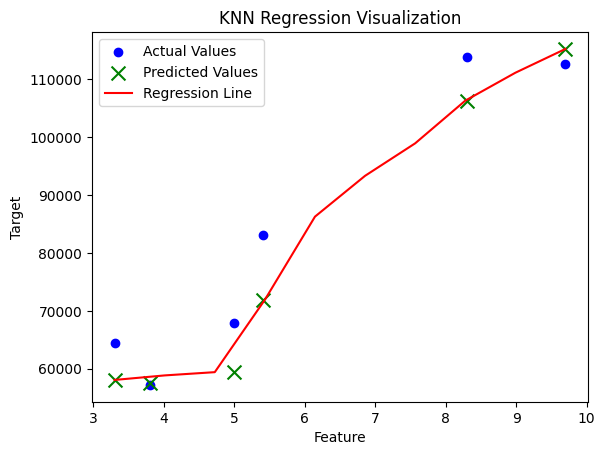

In [43]:
# Generate synthetic data for visualization
x_range = np.linspace(min(x_test.values), max(x_test.values), 10).reshape(-1, 1)

# Scatter plot of actual vs. predicted values
plt.scatter(x_test.values, y_test.values, label='Actual Values', color='blue')
plt.scatter(x_test.values, y_pred, label='Predicted Values', color='green', marker='x', s=100)

# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regression Visualization')
plt.show()